# **Online Retail Data Analysis**

## **1. Business Objective** 

Customer segmentation very important to make a decision, what action needed to increase revenue, build good relationship with customer and many more we can optimize the sales with customer segmentation. Customer segmentation would be give us a reference to take action for each customer in their segmentation, like a product differentiation, make a focus campaign for each customer and another strategy that we have. Customer segmentation made companies would be focusing with priority scale. This segmentation give us for reach the “star” customer with big purchase until “rare” customer with low purchase. The companies can be focus their energy, costs, and attention on that particular segment.


Since we have a customer segmentation problem, we will apply machine learning techniques to create proper customer segmentations.

## **2. Data Collection**

This Online Retail data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.

The dataset has been obtained from Kaggle.

Link: https://www.kaggle.com/carrie1/ecommerce-data

In [79]:
# Connecting to Google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [81]:
# Setting up some parameters for the workbook

from pandas.plotting import scatter_matrix

pd.set_option('display.max_rows', 500)
pd.options.display.max_columns = None
pd.options.display.float_format = '{:.4f}'.format

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (25, 5)

In [82]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_samples, silhouette_score

In [83]:
import datetime as dt

## **3. Data Preparation/Preprocessing**

We will start with loading and familiarizing with the dataset so that we can prepare the data for Machine Learning (ML) modelling.

In [84]:
# Loading the dataset

file_path = "/content/drive/My Drive/Colab Datasets/UK Retail Data/data.csv"
retail_data = pd.read_csv(file_path, encoding= 'unicode_escape')

In [85]:
# Checking the features and no. of records in the dataset

print("The number of records are : ", retail_data.shape[0])
print("The number of features are : ", retail_data.shape[1])
print("The list of features is : ", retail_data.columns)
retail_data.head()

The number of records are :  541909
The number of features are :  8
The list of features is :  Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26     2.5500  17850.0000  United Kingdom  
1  12/1/2010 8:26     3.3900  17850.0000  United Kingdom  
2  12/1/2010 8:26     2.7500  17850.0000  United Kingdom  
3  12/1/2010 8:26     3.3900  17850.0000  United Kingdom  
4  12/1/2010 8:26     3.3900  17850.0000  United Kingdom

### **3.1 Data Cleaning**

We will begin with data cleaning such that we can handle missing values, outliers, rare values and drop the unnecessary features that do not carry useful information.


In [86]:
# checking for duplicates

print("No. of duplicates records in the dataset : ", retail_data.columns.duplicated().sum())

No. of duplicates records in the dataset :  0


##### Observations:
1. There are no duplicate records in either of the three datasets.

In [87]:
# Checking the columns' titles and datatypes

retail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


##### Observations:

The dataset is composed of 541909 rows and 8 features. When going through the columns, we noticed that we have some missing values in the "CustomerID" and "Description".

#### **3.1.1 Handling Missing Values**

Identifying the features that have some missing values and imputing them.

In [88]:
# Checking the number of missing values in data

retail_data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

##### Observations:

There are 1454 missing values in "Description" and 135080 missing values in "CustomerID".

### **3.2 Exploratory Data Analysis**

After the data cleaning steps, we can now perform EDA on the dataset to discover patterns and relationships that will help in understanding the data better.

### **3.2.1 Univariate Analysis**

Analyzing each feature inidividually to gain insights from the data and discover any outliers.

In [89]:
# Checking the "InvoiceNo" feature

print("The no. of unique Invoice No. is : ", retail_data["InvoiceNo"].nunique())
print("The list of unique Invoice No. with counts is : \n", retail_data["InvoiceNo"].value_counts())

The no. of unique Invoice No. is :  25900
The list of unique Invoice No. with counts is : 
 573585    1114
581219     749
581492     731
580729     721
558475     705
          ... 
551135       1
538685       1
563851       1
561323       1
571731       1
Name: InvoiceNo, Length: 25900, dtype: int64


##### Observaions:

There are 25900 unique "InvoiceNo" in the dataset. 

It is a Nominal feautre with a 6-digit integral number uniquely assigned to each transaction. There are some values that starts with "c" which could mean a cancellation.

In [90]:
# Checking the "StockCode" feature

print("The no. of unique StockCode is : ", retail_data["StockCode"].nunique())
print("The list of unique StockCode with counts is : \n", retail_data["StockCode"].value_counts())

The no. of unique StockCode is :  4070
The list of unique StockCode with counts is : 
 85123A     2313
22423      2203
85099B     2159
47566      1727
20725      1639
           ... 
23059         1
21923         1
46776e        1
79323LP       1
85018C        1
Name: StockCode, Length: 4070, dtype: int64


#### Observations:
There are 4070 unique StockCode.

It is a Nominal feature with a 5-digit integral number that is uniquely assigned to each distinct product.

In [91]:
# Checking the "Description" feature

print("The no. of unique Description is : ", retail_data["Description"].nunique())
print("The list of unique Description with counts is : \n", retail_data["Description"].value_counts())

The no. of unique Description is :  4223
The list of unique Description with counts is : 
 WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
                                      ... 
FBA                                      1
PINK BERTIE MOBILE PHONE CHARM           1
POLYESTER FILLER PAD 60x40cm             1
dotcom adjust                            1
website fixed                            1
Name: Description, Length: 4223, dtype: int64


In [92]:
# Checking the missing value in "Description"

retail_data[retail_data["Description"].isnull()].head()

InvoiceNo StockCode Description  Quantity      InvoiceDate  UnitPrice  \
622     536414     22139         NaN        56  12/1/2010 11:52     0.0000   
1970    536545     21134         NaN         1  12/1/2010 14:32     0.0000   
1971    536546     22145         NaN         1  12/1/2010 14:33     0.0000   
1972    536547     37509         NaN         1  12/1/2010 14:33     0.0000   
1987    536549    85226A         NaN         1  12/1/2010 14:34     0.0000   

      CustomerID         Country  
622          nan  United Kingdom  
1970         nan  United Kingdom  
1971         nan  United Kingdom  
1972         nan  United Kingdom  
1987         nan  United Kingdom

In [93]:
# Checking the UnitPrice and CustomerID for the products with missing Descriptions

print("The Sum of Unit Price : ", retail_data[retail_data["Description"].isnull()]["UnitPrice"].sum())
print("The list of Unique CustomerID are : \n", retail_data[retail_data["Description"].isnull()]["CustomerID"].value_counts())

The Sum of Unit Price :  0.0
The list of Unique CustomerID are : 
 Series([], Name: CustomerID, dtype: int64)


#### Observations:
There are 4223 unique Description.

It is a Nominal feature for the description of the product.

The missing values of the descriptions corresponds to missing CustomerID details. Also, the UnitPrice of the products are also 0 for the products.

In [94]:
# Checking the feature "Quantity" 

print("The basic statistic for the feature is :\n", retail_data["Quantity"].describe())

The basic statistic for the feature is :
 count   541909.0000
mean         9.5522
std        218.0812
min     -80995.0000
25%          1.0000
50%          3.0000
75%         10.0000
max      80995.0000
Name: Quantity, dtype: float64


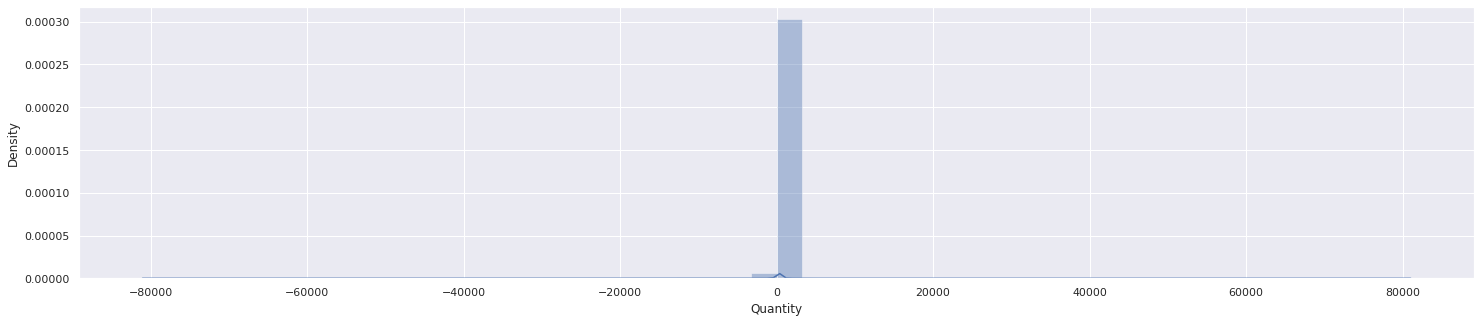

In [95]:
# Visualizing the distribution

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)

sns.distplot(retail_data["Quantity"], ax=axes)

##### Observations:

It shows the quantities of each product (item) per transaction.

There are some negative values in the feature. Maybe, this could mean that these quantities was returned or cancelled.

In [96]:
# Checking the feature "UnitPrice" 

print("The basic statistic for the feature is :\n", retail_data["UnitPrice"].describe())

The basic statistic for the feature is :
 count   541909.0000
mean         4.6111
std         96.7599
min     -11062.0600
25%          1.2500
50%          2.0800
75%          4.1300
max      38970.0000
Name: UnitPrice, dtype: float64


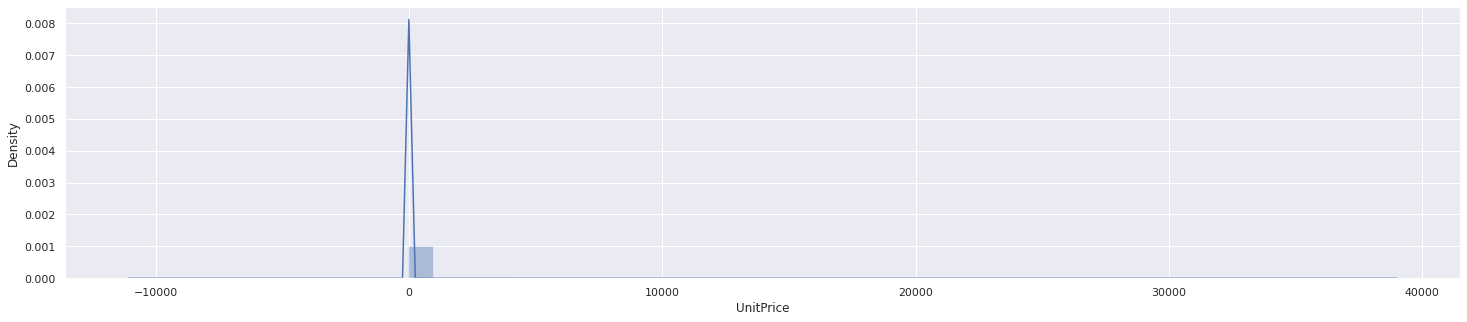

In [97]:
# Visualizing the distribution

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)

sns.distplot(retail_data["UnitPrice"], ax=axes)

##### Observations:

It shows Product price per unit in sterling.

There are some negative values in the feature. Maybe, this could mean that these quantities was returned or cancelled.

In [98]:
# Checking the "CustomerID" feature

print("The no. of unique CustomerID is : ", retail_data["CustomerID"].nunique())
print("The list of unique CustomerID with counts is : \n", retail_data["CustomerID"].value_counts())

The no. of unique CustomerID is :  4372
The list of unique CustomerID with counts is : 
 17841.0000    7983
14911.0000    5903
14096.0000    5128
12748.0000    4642
14606.0000    2782
              ... 
13391.0000       1
16579.0000       1
13366.0000       1
17763.0000       1
17846.0000       1
Name: CustomerID, Length: 4372, dtype: int64


##### Observations:

The CustomerID is a Nominal feature which is a 5-digit integral number uniquely assigned to each customer.

There are 4372 unique CustomerIDs in the feature.

There are some missing IDs corresponding to the missing description.

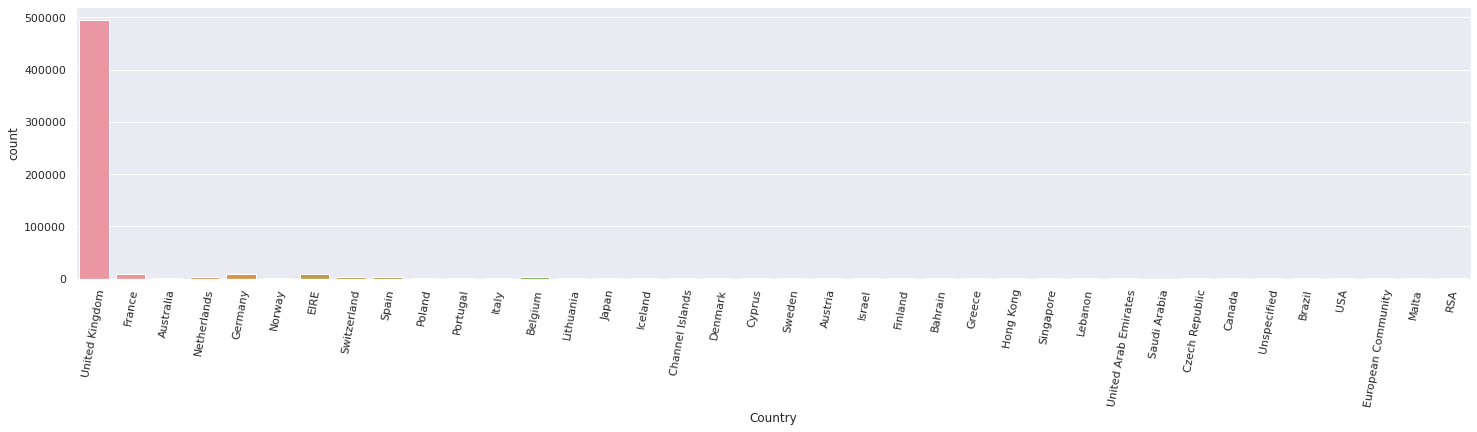

In [99]:
# Checking the feature "Country"

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)

sns.countplot("Country", data=retail_data, ax=axes)
plt.xticks(rotation=80)
plt.show()

In [100]:
print("The count of unique Countries is : ", retail_data["Country"].nunique())
print("The list of unique Countries with count are : \n", retail_data["Country"].value_counts())

The count of unique Countries is :  38
The list of unique Countries with count are : 
 United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Em

##### Observations:

It shows the name of the country where each customer resides.

There are 38 unique countries in the dataset.

UK has the highest representation for the transactions, constituting around 90%.

### **3.2.2 Bi-variate Analysis**

Analyzing multiple features together to discover relations, correlations and patterns. 

---

**1. Checking the Cancelled Invoices**

In [101]:
# Preparing the df with cancelled invoices

cancelled_orders = retail_data[retail_data["InvoiceNo"].astype(str).str.contains('C')]

In [102]:
# Checking whether missing "Description" corresponds to cancelled orders

cancelled_orders["Description"].isnull().sum()

0

In [103]:
# Checking the "Quantity" for the cancelled orders 

cancelled_orders[cancelled_orders["Quantity"] > 0]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

In [104]:
# Check how many records the dataframe of cancelled orders contain
print("The no. of cancelled orders are : ", len(cancelled_orders))

# Percentage of cancelled orders in total orders
total_orders = retail_data["InvoiceNo"].nunique()
cancelled_number = cancelled_orders["InvoiceNo"].nunique()
print("Percentage of unique canceled Invoices : {}/{} = {:.2f}%".format(cancelled_number, total_orders, cancelled_number / total_orders * 100))

The no. of cancelled orders are :  9288
Percentage of unique canceled Invoices : 3836/25900 = 14.81%


In [105]:
cancelled_orders.head()

InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

         InvoiceDate  UnitPrice  CustomerID         Country  
141   12/1/2010 9:41    27.5000  14527.0000  United Kingdom  
154   12/1/2010 9:49     4.6500  15311.0000  United Kingdom  
235  12/1/2010 10:24     1.6500  17548.0000  United Kingdom  
236  12/1/2010 10:24     0.2900  17548.0000  United Kingdom  
237  12/1/2010 10:24     0.2900  17548.0000  United Kingdom

##### Observations:

1. As we expected, negative values in the "Quantity" feature, means that it's a cancelled quantity because we didn't find any positive value for orders where "InvoiceNo" contains the prefix C.

2. There are 3836 unique cancelled Invoices which corresponds to 14.81% of total unique Invoices. Studying these cancelled orders may help in preventing future cancellations.

---

**2. What's the average number of orders per customer?**

In [106]:
# Grouping Invoices per customers

customer_with_invoices = pd.DataFrame(retail_data.groupby("CustomerID")["InvoiceNo"].nunique())
customer_with_invoices.head()

InvoiceNo
CustomerID           
12346.0000          2
12347.0000          7
12348.0000          4
12349.0000          1
12350.0000          1

In [107]:
# Checking the basic statistics for the feature

print("The basic statistics are : \n", customer_with_invoices.describe())

The basic statistics are : 
        InvoiceNo
count  4372.0000
mean      5.0755
std       9.3388
min       1.0000
25%       1.0000
50%       3.0000
75%       5.0000
max     248.0000


##### Observations:

1. There are 4372 unique CustomerIDs with 5 Invoices per customer on an average.
2. The minimum invoices is 1 and max is 248.

---

**3. What's the average number of unique items per order?**

In [108]:
# Grouping "StockCode" per "InvoiceNo" to count the number of unique items per invoices

invoices_with_stockcode = pd.DataFrame(retail_data.groupby("InvoiceNo", as_index=False)["StockCode"].nunique())
invoices_with_stockcode.columns=["InvoiceNo", "ProductNumber"]
invoices_with_stockcode.head()

InvoiceNo  ProductNumber
0    536365              7
1    536366              2
2    536367             12
3    536368              4
4    536369              1

In [109]:
# Checking the basic statistics for the feature

print("The basic statistics are : \n", invoices_with_stockcode.describe())

The basic statistics are : 
        ProductNumber
count     25900.0000
mean         20.5106
std          42.5005
min           1.0000
25%           2.0000
50%          10.0000
75%          23.0000
max        1110.0000


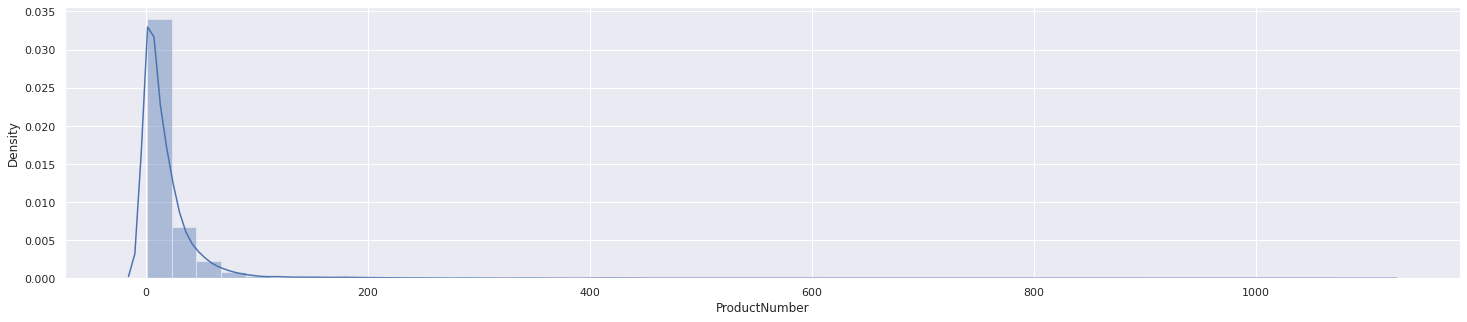

In [110]:
#Visualize the variable productsNumber distribution

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)
sns.distplot(invoices_with_stockcode["ProductNumber"], ax=axes)
plt.show()

##### Observations:

1. There are 25900 unique invoices with 20 unique items per invoice on an average.
2. The min unique items for a invoice is 1 and maximum is 1110.
3. The distributon is highly right skewed that shows 75% of the times customers buy less than 25 unique items.

---

**4. What is the total revenue per country?**

In [111]:
# Calculating "TotalCost"

retail_data["TotalCost"] = retail_data["Quantity"] * retail_data["UnitPrice"]

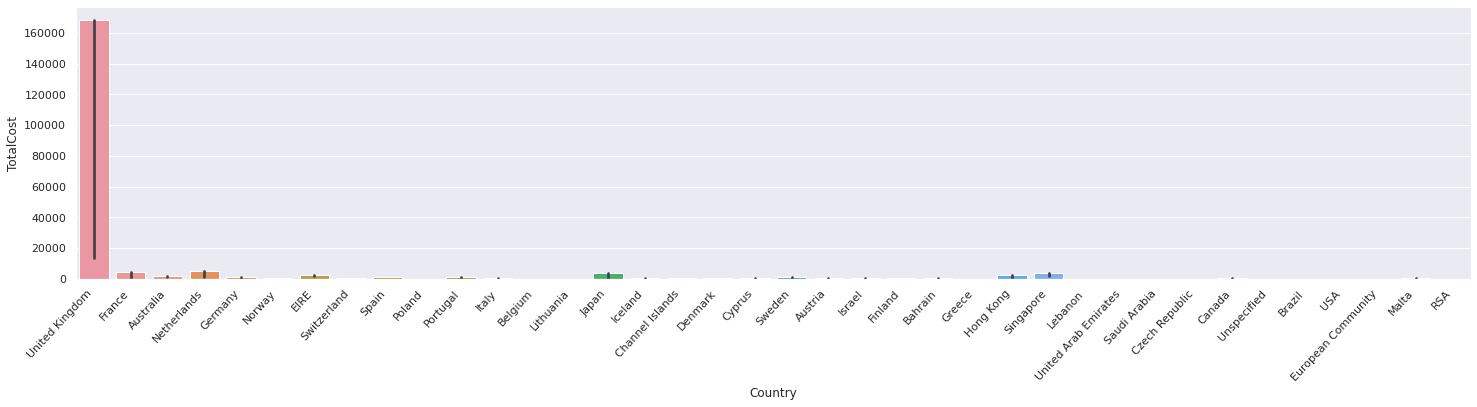

In [112]:
# Visualizing total revenue per country

sns.set(style="darkgrid")
fig, axes = plt.subplots(1, 1, figsize=(25, 5), sharey=True)

axes = sns.barplot(x="Country", y="TotalCost", data=retail_data, estimator=max)
axes.set_xticklabels(axes.get_xticklabels(), rotation=47, ha="right")
plt.show()

In [113]:
revenue_by_country = retail_data.groupby("Country", as_index=False)["TotalCost"].sum().sort_values(by="TotalCost", ascending=False)
revenue_by_country["TotalCost"].apply(lambda x: '%.4f' % x)
revenue_by_country.head()

Country    TotalCost
36  United Kingdom 8187806.3640
24     Netherlands  284661.5400
10            EIRE  263276.8200
14         Germany  221698.2100
13          France  197403.9000

In [114]:
retail_data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  TotalCost  
0  12/1/2010 8:26     2.5500  17850.0000  United Kingdom    15.3000  
1  12/1/2010 8:26     3.3900  17850.0000  United Kingdom    20.3400  
2  12/1/2010 8:26     2.7500  17850.0000  United Kingdom    22.0000  
3  12/1/2010 8:26     3.3900  17850.0000  United Kingdom    20.3400  
4  12/1/2010 8:26     3.3900  17850.0000  United Kingdom    20.3400

#### Observations:
1. UK seems to have the highest revenue from the customers of around 8M pounds.

---

**5. Exploring the data after filtering the country for UK**

In [115]:
# Filtering the data for country as UK

retail_uk = retail_data[retail_data["Country"] == "United Kingdom"]
retail_uk.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  TotalCost  
0  12/1/2010 8:26     2.5500  17850.0000  United Kingdom    15.3000  
1  12/1/2010 8:26     3.3900  17850.0000  United Kingdom    20.3400  
2  12/1/2010 8:26     2.7500  17850.0000  United Kingdom    22.0000  
3  12/1/2010 8:26     3.3900  17850.0000  United Kingdom    20.3400  
4  12/1/2010 8:26     3.3900  17850.0000  United Kingdom    20.3400

In [116]:
# Checking the no. of unique Customers

print("The no. of unique CustomerID in UK is :", retail_uk["CustomerID"].nunique())
print("Number of transactions: ", retail_uk["InvoiceNo"].nunique())
print("Number of products bought: ",retail_uk["StockCode"].nunique())
print("Percentage of customers NA: ", round(retail_uk["CustomerID"].isnull().sum() * 100 / len(retail_uk),2),"%")

The no. of unique CustomerID in UK is : 3950
Number of transactions:  23494
Number of products bought:  4065
Percentage of customers NA:  26.96 %


##### Observations:

So, we can conclude that not only most sales revenues are achieved in the UK, but also most customers are located there too. 

We can explore this to find more about what products the customers buy together and what possible future opportunities in the UK Market.



In [117]:
# Frequently bought items

groupedProduct = retail_uk.groupby(["StockCode", "Description"], as_index= False)["Quantity"].sum().sort_values(by="Quantity", ascending=False)
groupedProduct.head(10)

StockCode                         Description  Quantity
3600     84077   WORLD WAR 2 GLIDERS ASSTD DESIGNS     48326
4177    85099B             JUMBO BAG RED RETROSPOT     43167
1327     22197                      POPCORN HOLDER     34365
3937     84879       ASSORTED COLOUR BIRD ORNAMENT     33679
4203    85123A  WHITE HANGING HEART T-LIGHT HOLDER     32901
1767     22616          PACK OF 12 LONDON TISSUES      25307
527      21212     PACK OF 72 RETROSPOT CAKE CASES     24702
1306     22178     VICTORIAN GLASS HANGING T-LIGHT     23242
91       17003                 BROCADE RING PURSE      22801
14       15036           ASSORTED COLOURS SILK FAN     20322

In [118]:
# Invoices with highest Quantities

invoice_quantity = retail_uk.groupby(["InvoiceNo", "CustomerID"], as_index=False)["Quantity"].sum().sort_values(by="Quantity", ascending=False)
invoice_quantity.head()

InvoiceNo  CustomerID  Quantity
16623    581483  16446.0000     80995
1746     541431  12346.0000     74215
11184    567423  17450.0000     12572
15579    578841  13256.0000     12540
9338     562439  12931.0000     11848

In [119]:
retail_uk.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  TotalCost  
0  12/1/2010 8:26     2.5500  17850.0000  United Kingdom    15.3000  
1  12/1/2010 8:26     3.3900  17850.0000  United Kingdom    20.3400  
2  12/1/2010 8:26     2.7500  17850.0000  United Kingdom    22.0000  
3  12/1/2010 8:26     3.3900  17850.0000  United Kingdom    20.3400  
4  12/1/2010 8:26     3.3900  17850.0000  United Kingdom    20.3400

## **4. Market Basket Analysis**

It's important to know more about these most bought products. 

Is there any products that when one of them is bought, the other is bought too? 

To get an answer we will do "Market Basket Analysis" to find which products tend to be purchased together and which are most amenable to promotion.

In [120]:
# Remove additional spaces
retail_data["Description"] = retail_data["Description"].str.strip()

# Remove NA values
retail_data.dropna(axis=0, subset=["InvoiceNo"], inplace=True)

# Remove cancelled orders
retail_data["InvoiceNo"] = retail_data["InvoiceNo"].astype('str')
retail_data = retail_data[~retail_data["InvoiceNo"].str.contains('C')]

In [121]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

def create_basket(country_filter):
    # Pivoting the Description to make the items as features 
    basket = (retail_data[retail_data["Country"] == country_filter].groupby(["InvoiceNo", "Description"])["Quantity"].sum().unstack().reset_index().fillna(0).set_index("InvoiceNo"))
    return basket

In [122]:
# Creating basket for France

basket_french = create_basket("France")
basket_sets = basket_french.applymap(encode_units)
basket_sets.head()

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536370                            0                           0   
536852                            0                           0   
536974                            0                           0   
537065                            0                           0   
537463                            0                           0   

Description  12 EGG HOUSE PAINTED WOOD  12 MESSAGE CARDS WITH ENVELOPES  \
InvoiceNo                                                                 
536370                               0                                0   
536852                               0                                0   
536974                               0                                0   
537065                               0                                0   
537463                               0                                0   

Description  12 PENCIL SMALL TUBE WOODLAND  \
InvoiceNo                                    
536370                                   0   
536852                                   0   
536974                                   0   
537065                                   0   
537463                                   0   

Description  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  \
InvoiceNo                                                                       
536370                                         0                            0   
536852                                         0                            0   
536974                                         0                            0   
537065                                         0                            0   
537463                                         0                            0   

Description  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  \
InvoiceNo                                                                    
536370                               0                                   0   
536852                               0                                   0   
536974                               0                                   0   
537065                               0                                   0   
537463                               0                                   0   

Description  12 PENCILS TALL TUBE WOODLAND  \
InvoiceNo                                    
536370                                   0   
536852                                   0   
536974                                   0   
537065                                   0   
537463                                   0   

Description  15CM CHRISTMAS GLASS BALL 20 LIGHTS  \
InvoiceNo                                          
536370                                         0   
536852                                         0   
536974                                         0   
537065                                         0   
537463                                         0   

Description  16 PIECE CUTLERY SET PANTRY DESIGN  \
InvoiceNo                                         
536370                                        0   
536852                                        0   
536974                                        0   
537065                                        0   
537463                                        0   

Description  18PC WOODEN CUTLERY SET DISPOSABLE  20 DOLLY PEGS RETROSPOT  \
InvoiceNo                                                                  
536370                                        0                        0   
536852                                        0                        0   
536974                                        0                        0   
537065                                        0                        0   
537463                                        0                 

In [123]:
# Applying Aprori algorithm

frequent_itemsets = apriori(basket_sets, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
rules.head()

antecedents                   consequents  \
0  (ALARM CLOCK BAKELIKE GREEN)   (ALARM CLOCK BAKELIKE PINK)   
1   (ALARM CLOCK BAKELIKE PINK)  (ALARM CLOCK BAKELIKE GREEN)   
2    (ALARM CLOCK BAKELIKE RED)  (ALARM CLOCK BAKELIKE GREEN)   
3  (ALARM CLOCK BAKELIKE GREEN)    (ALARM CLOCK BAKELIKE RED)   
4    (ALARM CLOCK BAKELIKE RED)   (ALARM CLOCK BAKELIKE PINK)   

   antecedent support  consequent support  support  confidence   lift  \
0              0.0969              0.1020   0.0740      0.7632 7.4789   
1              0.1020              0.0969   0.0740      0.7250 7.4789   
2              0.0944              0.0969   0.0791      0.8378 8.6430   
3              0.0969              0.0944   0.0791      0.8158 8.6430   
4              0.0944              0.1020   0.0740      0.7838 7.6811   

   leverage  conviction  
0    0.0641      3.7914  
1    0.0641      3.2839  
2    0.0699      5.5689  
3    0.0699      4.9162  
4    0.0643      4.1531

##### Observations:

According to the results a customer is 7 times more likely to buy a "ALARM CLOCK BAKELIKE PINK" than an average customer (lift) if he/she buys "ALARM CLOCK BAKELIKE GREEN". 

This rule is "true" in 77% of the cases (confidence). This can be used as insight to recommend "ALARM CLOCK BAKELIKE PINK" for those who bought the "Green" one.

In [124]:
# Creating basket for Germany

basket_germany = create_basket("Germany")
basket2_sets = basket_germany.applymap(encode_units)
basket2_sets.head()

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536527                            0                           0   
536840                            0                           0   
536861                            0                           0   
536967                            0                           0   
536983                            0                           0   

Description  12 IVORY ROSE PEG PLACE SETTINGS  \
InvoiceNo                                       
536527                                      0   
536840                                      0   
536861                                      0   
536967                                      0   
536983                                      0   

Description  12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMALL TUBE WOODLAND  \
InvoiceNo                                                                     
536527                                     0                              0   
536840                                     0                              0   
536861                                     0                              0   
536967                                     0                              0   
536983                                     0                              0   

Description  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  \
InvoiceNo                                                                       
536527                                         0                            0   
536840                                         0                            0   
536861                                         0                            0   
536967                                         0                            0   
536983                                         0                            0   

Description  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  \
InvoiceNo                                                                    
536527                               0                                   0   
536840                               0                                   0   
536861                               0                                   0   
536967                               0                                   0   
536983                               0                                   0   

Description  12 PENCILS TALL TUBE SKULLS  12 PENCILS TALL TUBE WOODLAND  \
InvoiceNo                                                                 
536527                                 0                              0   
536840                                 0                              0   
536861                                 0                              0   
536967                                 0                              0   
536983                                 0                              0   

Description  12 PINK HEN+CHICKS IN BASKET  12 RED ROSE PEG PLACE SETTINGS  \
InvoiceNo                                                                   
536527                                  0                               0   
536840                                  0                               0   
536861                                  0                               0   
536967                                  0                               0   
536983                                  0                               0   

Description  16 PIECE CUTLERY SET PANTRY DESIGN  \
InvoiceNo                                         
536527                                        0   
536840                                        0   
536861                                        0   
536967                                        0   
536983                                        0   

Description  2 PICTURE BOOK EGGS EASTER BUNNY  \
InvoiceNo                                   

In [125]:
# Applying Aprori algorithm

frequent_itemsets2 = apriori(basket2_sets, min_support=0.05, use_colnames=True)
rules2 = association_rules(frequent_itemsets2, metric="lift", min_threshold=1.2)
rules2.head()

antecedents                           consequents  \
0   (PLASTERS IN TIN WOODLAND ANIMALS)       (PLASTERS IN TIN CIRCUS PARADE)   
1      (PLASTERS IN TIN CIRCUS PARADE)    (PLASTERS IN TIN WOODLAND ANIMALS)   
2      (PLASTERS IN TIN CIRCUS PARADE)   (ROUND SNACK BOXES SET OF 4 FRUITS)   
3  (ROUND SNACK BOXES SET OF 4 FRUITS)       (PLASTERS IN TIN CIRCUS PARADE)   
4      (PLASTERS IN TIN CIRCUS PARADE)  (ROUND SNACK BOXES SET OF4 WOODLAND)   

   antecedent support  consequent support  support  confidence   lift  \
0              0.1379              0.1160   0.0678      0.4921 4.2429   
1              0.1160              0.1379   0.0678      0.5849 4.2429   
2              0.1160              0.1575   0.0503      0.4340 2.7545   
3              0.1575              0.1160   0.0503      0.3194 2.7545   
4              0.1160              0.2451   0.0569      0.4906 2.0017   

   leverage  conviction  
0    0.0518      1.7404  
1    0.0518      2.0770  
2    0.0321      1.4883  
3    0.0321      1.2990  
4    0.0285      1.4819

##### Observations:

According to the results, a customer is 4 times more likely to buy "PLASTERS IN TIN WOODLAND ANIMALS" than an average customer (lift) if he/she buys "PLASTERS IN TIN CIRCUS PARADE". 

This rule is "true" in 42% of the cases (confidence). This can be used as insight to recommend "PLASTERS IN TIN WOODLAND ANIMALS" for tthose who bought the Green one.

In [126]:
# Creating basket for United Kingdom

basket_uk = create_basket("United Kingdom")
basket3_sets = basket_uk.applymap(encode_units)
basket3_sets.head()

Description  *Boombox Ipod Classic  *USB Office Mirror Ball  \
InvoiceNo                                                     
536365                           0                        0   
536366                           0                        0   
536367                           0                        0   
536368                           0                        0   
536369                           0                        0   

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536365                            0                           0   
536366                            0                           0   
536367                            0                           0   
536368                            0                           0   
536369                            0                           0   

Description  12 DAISY PEGS IN WOOD BOX  12 EGG HOUSE PAINTED WOOD  \
InvoiceNo                                                           
536365                               0                          0   
536366                               0                          0   
536367                               0                          0   
536368                               0                          0   
536369                               0                          0   

Description  12 HANGING EGGS HAND PAINTED  12 IVORY ROSE PEG PLACE SETTINGS  \
InvoiceNo                                                                     
536365                                  0                                 0   
536366                                  0                                 0   
536367                                  0                                 0   
536368                                  0                                 0   
536369                                  0                                 0   

Description  12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMALL TUBE WOODLAND  \
InvoiceNo                                                                     
536365                                     0                              0   
536366                                     0                              0   
536367                                     0                              0   
536368                                     0                              0   
536369                                     0                              0   

Description  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  \
InvoiceNo                                                                       
536365                                         0                            0   
536366                                         0                            0   
536367                                         0                            0   
536368                                         0                            0   
536369                                         0                            0   

Description  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  \
InvoiceNo                                                                    
536365                               0                                   0   
536366                               0                                   0   
536367                               0                                   0   
536368                               0                                   0   
536369                               0                                   0   

Description  12 PENCILS TALL TUBE SKULLS  12 PENCILS TALL TUBE WOODLAND  \
InvoiceNo                                                                 
536365                                 0                              0   
536366                                 0                              0   
536367                                 0                              0   
536368

In [127]:
frequent_itemsets_uk = apriori(basket3_sets, min_support=0.05, use_colnames=True)
rules3 = association_rules(frequent_itemsets_uk, metric="lift", min_threshold=0.8)
rules3.head()

Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction]
Index: []

##### Observations

As we didn't find any rules for United Kigdom customers. We will try other filters.

In [128]:
# Filtering UK Retail data and Quantity being less than 10

retail_data_uk_filtered = retail_data[retail_data["Country"] == "United Kingdom"]
basket_uk = (retail_data_uk_filtered[retail_data_uk_filtered["Quantity"] < 10].groupby(["InvoiceNo", "Description"])["Quantity"].sum().unstack().reset_index().fillna(0).set_index("InvoiceNo"))

In [129]:
basket4_sets = basket_uk.applymap(encode_units)
basket4_sets.head()

Description  *Boombox Ipod Classic  *USB Office Mirror Ball  \
InvoiceNo                                                     
536365                           0                        0   
536366                           0                        0   
536367                           0                        0   
536368                           0                        0   
536369                           0                        0   

Description  10 COLOUR SPACEBOY PEN  12 COLOURED PARTY BALLOONS  \
InvoiceNo                                                         
536365                            0                           0   
536366                            0                           0   
536367                            0                           0   
536368                            0                           0   
536369                            0                           0   

Description  12 DAISY PEGS IN WOOD BOX  12 EGG HOUSE PAINTED WOOD  \
InvoiceNo                                                           
536365                               0                          0   
536366                               0                          0   
536367                               0                          0   
536368                               0                          0   
536369                               0                          0   

Description  12 HANGING EGGS HAND PAINTED  12 IVORY ROSE PEG PLACE SETTINGS  \
InvoiceNo                                                                     
536365                                  0                                 0   
536366                                  0                                 0   
536367                                  0                                 0   
536368                                  0                                 0   
536369                                  0                                 0   

Description  12 MESSAGE CARDS WITH ENVELOPES  12 PENCIL SMALL TUBE WOODLAND  \
InvoiceNo                                                                     
536365                                     0                              0   
536366                                     0                              0   
536367                                     0                              0   
536368                                     0                              0   
536369                                     0                              0   

Description  12 PENCILS SMALL TUBE RED RETROSPOT  12 PENCILS SMALL TUBE SKULL  \
InvoiceNo                                                                       
536365                                         0                            0   
536366                                         0                            0   
536367                                         0                            0   
536368                                         0                            0   
536369                                         0                            0   

Description  12 PENCILS TALL TUBE POSY  12 PENCILS TALL TUBE RED RETROSPOT  \
InvoiceNo                                                                    
536365                               0                                   0   
536366                               0                                   0   
536367                               0                                   0   
536368                               0                                   0   
536369                               0                                   0   

Description  12 PENCILS TALL TUBE SKULLS  12 PENCILS TALL TUBE WOODLAND  \
InvoiceNo                                                                 
536365                                 0                              0   
536366                                 0                              0   
536367                                 0                              0   
536368

In [130]:
frequent_itemsets_uk = apriori(basket4_sets, min_support=0.03, use_colnames=True)
rules4 = association_rules(frequent_itemsets_uk, metric="lift", min_threshold=0.5)
rules4.head()

antecedents                        consequents  \
0         (ALARM CLOCK BAKELIKE RED)       (ALARM CLOCK BAKELIKE GREEN)   
1       (ALARM CLOCK BAKELIKE GREEN)         (ALARM CLOCK BAKELIKE RED)   
2  (GREEN REGENCY TEACUP AND SAUCER)   (PINK REGENCY TEACUP AND SAUCER)   
3   (PINK REGENCY TEACUP AND SAUCER)  (GREEN REGENCY TEACUP AND SAUCER)   
4  (GREEN REGENCY TEACUP AND SAUCER)  (ROSES REGENCY TEACUP AND SAUCER)   

   antecedent support  consequent support  support  confidence    lift  \
0              0.0537              0.0492   0.0302      0.5632 11.4468   
1              0.0492              0.0537   0.0302      0.6146 11.4468   
2              0.0521              0.0382   0.0309      0.5929 15.4999   
3              0.0382              0.0521   0.0309      0.8074 15.4999   
4              0.0521              0.0513   0.0369      0.7085 13.8226   

   leverage  conviction  
0    0.0276      2.1770  
1    0.0276      2.4553  
2    0.0289      2.3622  
3    0.0289      4.9209  
4    0.0342      3.2546

##### Observations:

We arrived to distinguish some rules related to France and Germany Market which can be used to make recommendations for our customers, but to better understand their preferences, the suggestion would be if to categorize the products by finding their root words, like for example for ALARM CLOCK BAKELIKE GREEN, the root word can be Alarm (more general category) and use these categories to cluster the product purchases.

Also, it will be interesting to apply Collaborative Filtering Recommendations based on preferred items and items bought together.

---

## **5. Customer Segmentation**

Customer Segmentation is necessary in order to understand customers behaviors. It leverages aqcuired customer data and their transactions to divide customers into groups.

Our goal is to cluster our customers to get insights in:
  - Increasing revenue (Knowing customers who present most of our revenue)
  - Increasing customer retention
  - Discovering Trends and patterns
  - Defining customers at risk

### **5.1 RFM Analysis**

We will do RFM Analysis as a first step and then combine RFM with predictive algorithms which will answer following questions:
  1. Who are our best customers?
  2. Who has the potential to be converted in more profitable customers?
  3. Which customers we must retain?
  4. Which group of customers is most likely to respond to our current campaign?


As customer clusters may vary by geography, we’ll restrict the data to only United Kingdom customers, which contains most of our customers historical data.

In [131]:
# Creating a new feature called date which contains the date of invoice only

retail_uk["datetime"] = pd.to_datetime(retail_uk["InvoiceDate"], errors='coerce')
retail_uk["date"] = retail_uk["datetime"].dt.date

In [132]:
# Remove canceled orders

retail_uk = retail_uk[retail_uk["Quantity"] > 0]

In [133]:
# Remove records where customerID are NA

retail_uk.dropna(subset=["CustomerID"], how="all", inplace=True)

In [134]:
# Restrict the data to one full year because it's better to use a metric per Months or Years in RFM

retail_uk = retail_uk[retail_uk["date"] >= dt.date(2010, 12, 9)]

In [135]:
print("Summary..")

#exploring the unique values of each attribute
print("Number of records : ", retail_uk.shape[0])
print("Number of unique transactions : ", retail_uk["InvoiceNo"].nunique())
print("Number of unique products bought : ", retail_uk["StockCode"].nunique())
print("Number of unique Customers : ", retail_uk["CustomerID"].nunique())
print("Percentage of Customers NA : ", round(retail_uk["CustomerID"].isnull().sum() * 100 / len(retail_data), 2), "%")

Summary..
Number of records :  342478
Number of unique transactions :  16017
Number of unique products bought :  3611
Number of unique Customers :  3863
Percentage of Customers NA :  0.0 %


In [136]:
retail_uk.head()

InvoiceNo StockCode                          Description  Quantity  \
19632    537879     22114    HOT WATER BOTTLE TEA AND SYMPATHY        12   
19633    537879     22835      HOT WATER BOTTLE I AM SO POORLY         8   
19634    537879     85150        LADIES & GENTLEMEN METAL SIGN         6   
19635    537879     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS         4   
19636    537879     21524       DOORMAT SPOTTY HOME SWEET HOME         2   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalCost  \
19632  12/9/2010 8:34     3.9500  14243.0000  United Kingdom    47.4000   
19633  12/9/2010 8:34     4.6500  14243.0000  United Kingdom    37.2000   
19634  12/9/2010 8:34     2.5500  14243.0000  United Kingdom    15.3000   
19635  12/9/2010 8:34     7.9500  14243.0000  United Kingdom    31.8000   
19636  12/9/2010 8:34     7.9500  14243.0000  United Kingdom    15.9000   

                 datetime        date  
19632 2010-12-09 08:34:00  2010-12-09  
19633 2010-12-09 08:34:00  2010-12-09  
19634 2010-12-09 08:34:00  2010-12-09  
19635 2010-12-09 08:34:00  2010-12-09  
19636 2010-12-09 08:34:00  2010-12-09

---

RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups.

RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

1. RECENCY (R): Days since last purchase
2.FREQUENCY (F): Total number of purchases
3. MONETARY VALUE (M): Total money this customer spent.

We will create those 3 customer attributes for each customer.

In [137]:
# Last date available in our dataset

retail_uk["date"].max()

datetime.date(2011, 12, 9)

In [150]:
# The last date we have is 2011-09-09 so we will use it as reference

now = dt.date(2011, 12, 9)
print(now)

2011-12-09


In [151]:
# Group by customers and check last date of purshace

recency_df = retail_uk.groupby(by="CustomerID", as_index=False)["date"].max()
recency_df.columns = ["CustomerID", "LastPurshaceDate"]
recency_df.head()

CustomerID LastPurshaceDate
0  12346.0000       2011-01-18
1  12747.0000       2011-12-07
2  12748.0000       2011-12-09
3  12749.0000       2011-12-06
4  12820.0000       2011-12-06

In [152]:
# Calculate recency

recency_df["Recency"] = recency_df["LastPurshaceDate"].apply(lambda x: (now - x).days)

In [153]:
# Calculate "Frequency"

# Drop duplicates
retail_uk_copy = retail_uk
retail_uk_copy.drop_duplicates(subset=["InvoiceNo", "CustomerID"], keep="first", inplace=True)

In [154]:
#calculate frequency of purchases

frequency_df = retail_uk_copy.groupby(by=["CustomerID"], as_index=False)["InvoiceNo"].count()
frequency_df.columns = ["CustomerID", "Frequency"]
frequency_df.head()

CustomerID  Frequency
0  12346.0000          1
1  12747.0000         10
2  12748.0000        196
3  12749.0000          5
4  12820.0000          4

In [155]:
# Create column total cost

retail_uk["TotalCost"] = retail_uk["Quantity"] * retail_uk["UnitPrice"]

In [156]:
# Calculate Monetary feature

monetary_df = retail_uk.groupby(by="CustomerID", as_index=False).agg({"TotalCost": 'sum'})
monetary_df.columns = ["CustomerID", "Monetary"]
monetary_df.head()

CustomerID   Monetary
0  12346.0000 77183.6000
1  12747.0000   658.8900
2  12748.0000  3739.2300
3  12749.0000    98.3500
4  12820.0000    58.2000

In [157]:
# Merge recency dataframe with frequency dataframe
temp_df = recency_df.merge(frequency_df, on="CustomerID")

# Merge with monetary dataframe to get a df with the 3 features
rfm_df = temp_df.merge(monetary_df, on="CustomerID")

In [158]:
# Use CustomerID as index

rfm_df.set_index("CustomerID", inplace=True)
rfm_df.head()

LastPurshaceDate  Recency  Frequency   Monetary
CustomerID                                                
12346.0000       2011-01-18      325          1 77183.6000
12747.0000       2011-12-07        2         10   658.8900
12748.0000       2011-12-09        0        196  3739.2300
12749.0000       2011-12-06        3          5    98.3500
12820.0000       2011-12-06        3          4    58.2000

In [159]:
# drop LastPurchaseDate as we don't need it anymore

rfm_df.drop("LastPurshaceDate", axis=1,inplace=True)

In [160]:
retail_uk.head()

InvoiceNo StockCode                        Description  Quantity  \
19632    537879     22114  HOT WATER BOTTLE TEA AND SYMPATHY        12   
19640    537880     21669    BLUE STRIPE CERAMIC DRAWER KNOB        12   
19656    537881     22730         ALARM CLOCK BAKELIKE IVORY        16   
19668    537882     22804    CANDLEHOLDER PINK HANGING HEART        32   
19672    537883     84946    ANTIQUE SILVER TEA GLASS ETCHED        12   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalCost  \
19632  12/9/2010 8:34     3.9500  14243.0000  United Kingdom    47.4000   
19640  12/9/2010 9:14     1.2500  12963.0000  United Kingdom    15.0000   
19656  12/9/2010 9:23     3.7500  15513.0000  United Kingdom    60.0000   
19668  12/9/2010 9:25     2.5500  15079.0000  United Kingdom    81.6000   
19672  12/9/2010 9:27     1.2500  14437.0000  United Kingdom    15.0000   

                 datetime        date  
19632 2010-12-09 08:34:00  2010-12-09  
19640 2010-12-09 09:14:00  2010-12-09  
19656 2010-12-09 09:23:00  2010-12-09  
19668 2010-12-09 09:25:00  2010-12-09  
19672 2010-12-09 09:27:00  2010-12-09

In [161]:
# Get the 80% of the revenue

pareto_cutoff = rfm_df["Monetary"].sum() * 0.8
print("The 80% of total revenue is : ", round(pareto_cutoff, 2))

The 80% of total revenue is :  890679.54


In [163]:
customers_rank = rfm_df

# Create a new column that is the rank of the value of coverage in ascending order
customers_rank["Rank"] = customers_rank["Monetary"].rank(ascending=0)
customers_rank.sort_values("Rank", ascending=True)

Recency  Frequency    Monetary      Rank
CustomerID                                          
16446.0000        0          2 168471.2500    1.0000
12346.0000      325          1  77183.6000    2.0000
15098.0000      182          3  39916.5000    3.0000
18102.0000        0         57  39646.4500    4.0000
17949.0000        1         44  28685.6900    5.0000
...             ...        ...         ...       ...
15503.0000      362          1      0.4200 3859.5000
15645.0000       18          1      0.4200 3859.5000
17914.0000        3          1      0.3900 3861.5000
13271.0000       37          1      0.3900 3861.5000
13256.0000       14          1      0.0000 3863.0000

[3863 rows x 4 columns]

In [165]:
# Get top 20% of the customers
top_20_cutoff = 3863 * 20 // 100

# Sum the monetary values over the customer with rank <= top_20_cutoff
revenueByTop20 = customers_rank[customers_rank["Rank"] <= top_20_cutoff]['Monetary'].sum()
revenueByTop20

976683.3499999999

##### Observations:

In our case, the 80% of total revenue is not achieved by the 20% of TOP customers but approximately, it does, because they are less than our 20% TOP customers who achieve it. It would be interesting to study this group of customers because they are those who make our most revenue.

---

The simplest way to create customers segments from RFM Model is to use Quartiles. We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. 

A final RFM score is calculated simply by combining individual RFM score numbers.



In [169]:
# RFM Quartiles

quantiles = rfm_df.drop("Rank", axis=1).quantile(q= [0.25, 0.5, 0.75])
quantiles

Recency  Frequency  Monetary
0.2500  17.0000     1.0000   17.4000
0.5000  49.0000     2.0000   45.0000
0.7500 134.0000     5.0000  121.6000

In [170]:
quantiles.to_dict()

{'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 17.4, 0.5: 45.0, 0.75: 121.6},
 'Recency': {0.25: 17.0, 0.5: 49.0, 0.75: 134.0}}

Creation of RFM segmentation table.

We will create two segmentation classes since, high recency is bad, while high frequency and monetary value is good.

In [168]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def RScore(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMScore(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [171]:
# Create rfm segmentation table

rfm_segmentation = rfm_df
rfm_segmentation["R_Quartile"] = rfm_segmentation["Recency"].apply(RScore, args=("Recency", quantiles))
rfm_segmentation["F_Quartile"] = rfm_segmentation["Frequency"].apply(FMScore, args=("Frequency", quantiles))
rfm_segmentation["M_Quartile"] = rfm_segmentation["Monetary"].apply(FMScore, args=("Monetary", quantiles))

In [173]:
rfm_segmentation["RFMScore"] = rfm_segmentation.R_Quartile.map(str) + rfm_segmentation.F_Quartile.map(str) + rfm_segmentation.M_Quartile.map(str)

In [174]:
rfm_segmentation.head()

Recency  Frequency   Monetary      Rank  R_Quartile  F_Quartile  \
CustomerID                                                                    
12346.0000      325          1 77183.6000    2.0000           1           1   
12747.0000        2         10   658.8900  183.0000           4           4   
12748.0000        0        196  3739.2300   34.0000           4           4   
12749.0000        3          5    98.3500 1140.0000           4           3   
12820.0000        3          4    58.2000 1665.5000           4           3   

            M_Quartile RFMScore  
CustomerID                       
12346.0000           4      114  
12747.0000           4      444  
12748.0000           4      444  
12749.0000           3      433  
12820.0000           3      433

In [175]:
# Checking the top customers

rfm_segmentation[rfm_segmentation["RFMScore"] == "444"].sort_values("Monetary", ascending=False).head(10)

Recency  Frequency   Monetary    Rank  R_Quartile  F_Quartile  \
CustomerID                                                                  
18102.0000        0         57 39646.4500  4.0000           4           4   
17949.0000        1         44 28685.6900  5.0000           4           4   
17450.0000        8         44 25953.5100  6.0000           4           4   
16013.0000        3         45 17163.2800  8.0000           4           4   
16333.0000        7         22 14418.9600  9.0000           4           4   
15769.0000        7         25 11660.8400 11.0000           4           4   
12901.0000        8         28  9230.4500 12.0000           4           4   
13798.0000        1         56  7786.2600 13.0000           4           4   
16684.0000        4         28  7700.0800 14.0000           4           4   
17857.0000        4         23  7655.1800 15.0000           4           4   

            M_Quartile RFMScore  
CustomerID                       
18102.0000           4      444  
17949.0000           4      444  
17450.0000           4      444  
16013.0000           4      444  
16333.0000           4      444  
15769.0000           4      444  
12901.0000           4      444  
13798.0000           4      444  
16684.0000           4      444  
17857.0000           4      444

In [176]:
# How many customers do we have in each segment?

print("Best Customers : ", len(rfm_segmentation[rfm_segmentation["RFMScore"] == '444']))
print("Loyal Customers : ", len(rfm_segmentation[rfm_segmentation["F_Quartile"] == 4]))
print("Big Spenders : ", len(rfm_segmentation[rfm_segmentation["M_Quartile"] == 4]))
print("Almost Lost : ", len(rfm_segmentation[rfm_segmentation["RFMScore"] == '244']))
print("Lost Customers : ", len(rfm_segmentation[rfm_segmentation["RFMScore"] == '144']))
print("Lost Cheap Customers : ", len(rfm_segmentation[rfm_segmentation["RFMScore"] == '111']))

Best Customers :  356
Loyal Customers :  752
Big Spenders :  966
Almost Lost :  64
Lost Customers :  9
Lost Cheap Customers :  353


##### Observations:

Now that we knew our customers segments we can choose how to target or deal with each segment.

For example:

Best Customers - Champions: Reward them. They can be early adopters to new products. Suggest them "Refer a friend".

At Risk: Send them personalized emails to encourage them to shop.



---

### **5.2 KMeans Clustering**

To gain even further insight into customer behavior, we can dig deeper in the relationship between RFM variables.

RFM model can be used in conjunction with certain predictive models like k-means clustering, Logistic Regression and Recommendation to produce better informative results on customer behavior.

We will go for k-means since it has been widely used for Market Segmentation.

In [177]:
# Preprocessing data

rfm_data = rfm_df.drop(["Rank", "R_Quartile", "F_Quartile", "M_Quartile", "RFMScore"], axis=1)
rfm_data.head()

Recency  Frequency   Monetary
CustomerID                               
12346.0000      325          1 77183.6000
12747.0000        2         10   658.8900
12748.0000        0        196  3739.2300
12749.0000        3          5    98.3500
12820.0000        3          4    58.2000

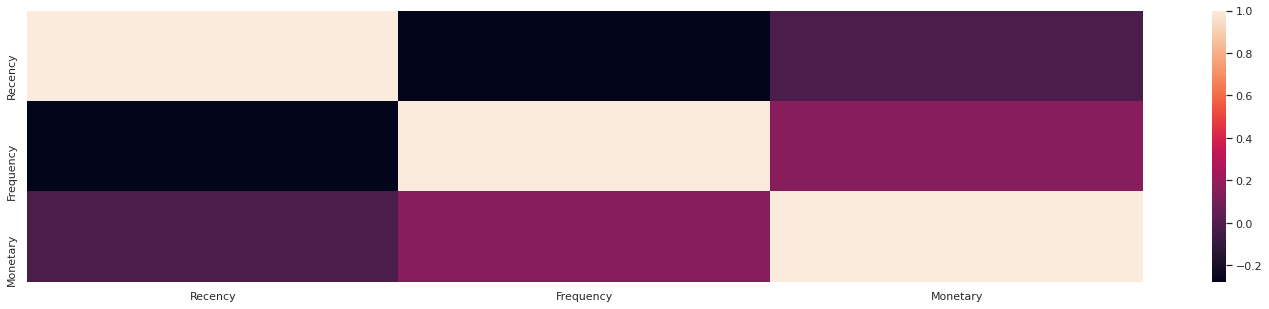

In [178]:
# Feature Correlation

sns.heatmap(rfm_data.corr())

##### Observations:
On one hand, we have a negative correlation between Recency and Frequency & Recency and Monetary.

On the other hand, the correlation between Monetary and Frequency is positive comparing to negative ones but still not that strong.



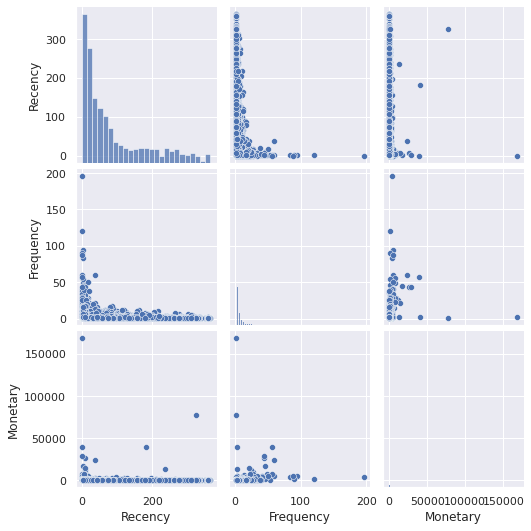

In [179]:
# Visualize feature distributions

sns.pairplot(rfm_data, )

##### Observations:

We can notice that we have a skewed distribution of the 3 variables and there exist outliers.

This indicates how normalization is required to make the data features normally distributed as clustering algorithms work well with normally distributed data.

In [180]:
# Log transformation

rfm_r_log = np.log(rfm_data["Recency"] + 0.1) 
rfm_f_log = np.log(rfm_data["Frequency"])
rfm_m_log = np.log(rfm_data["Monetary"] + 0.1)

log_data = pd.DataFrame({'Monetary': rfm_m_log, 'Recency': rfm_r_log, 'Frequency': rfm_f_log})

log_data.head()

Monetary  Recency  Frequency
CustomerID                              
12346.0000   11.2539   5.7841     0.0000
12747.0000    6.4907   0.7419     2.3026
12748.0000    8.2267  -2.3026     5.2781
12749.0000    4.5895   1.1314     1.6094
12820.0000    4.0656   1.1314     1.3863

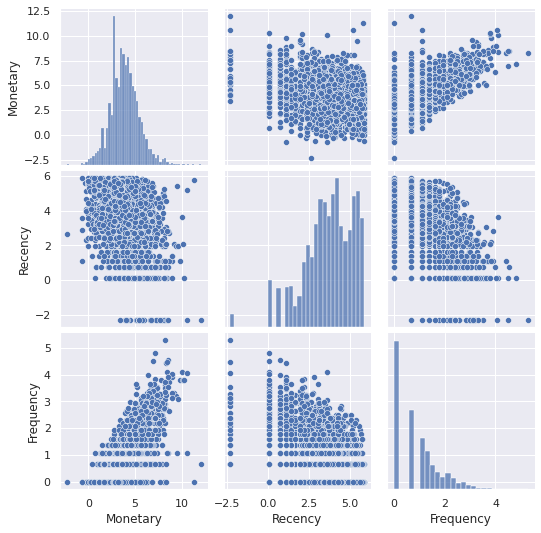

In [183]:
# Visualize feature distributions

sns.pairplot(log_data)

In [184]:
log_data.corr()

Monetary  Recency  Frequency
Monetary     1.0000  -0.3644     0.7156
Recency     -0.3644   1.0000    -0.5700
Frequency    0.7156  -0.5700     1.0000

##### Observations:

The distributions of Frequency and Monetary are better, more normalized, but it's not the case with Recency Distribution, which is improved but not as much.

Now, Monetary and Frequency are more strongly correlated.

In [187]:
# Applying KMeans

matrix = log_data.values
for n_clusters in range(2, 10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.38921483541776325
For n_clusters = 3 The average silhouette_score is : 0.30561967843301624
For n_clusters = 4 The average silhouette_score is : 0.30987764373489646
For n_clusters = 5 The average silhouette_score is : 0.29019589347459573
For n_clusters = 6 The average silhouette_score is : 0.2953491454701318
For n_clusters = 7 The average silhouette_score is : 0.29125595604834686
For n_clusters = 8 The average silhouette_score is : 0.2922920117454582
For n_clusters = 9 The average silhouette_score is : 0.294574577214638


##### Observations:

The best silhouette score obtained is when the number of clusters is 2.

In [188]:
# Fitting the data with cluster number as 2

n_clusters = 2
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
kmeans.fit(matrix)
clusters_customers = kmeans.predict(matrix)
silhouette_avg = silhouette_score(matrix, clusters_customers)
print("score de silhouette: {:<.3f}".format(silhouette_avg))

score de silhouette: 0.389


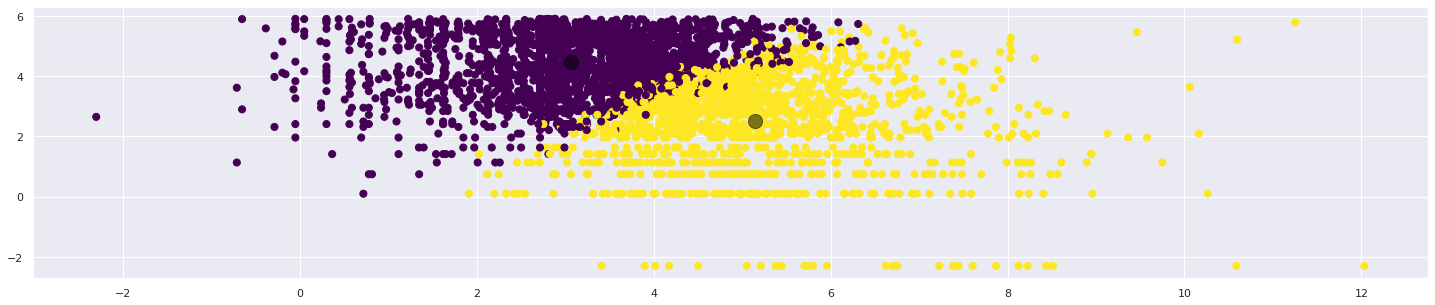

In [189]:
#create a scatter plot
plt.scatter(matrix[:, 0], matrix[:, 1], c = clusters_customers, s=50, cmap='viridis')

#select cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [190]:
# What's the number of customers in each cluster?
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns = ["NumberCustomers"]).T

0     1
NumberCustomers  2337  1526

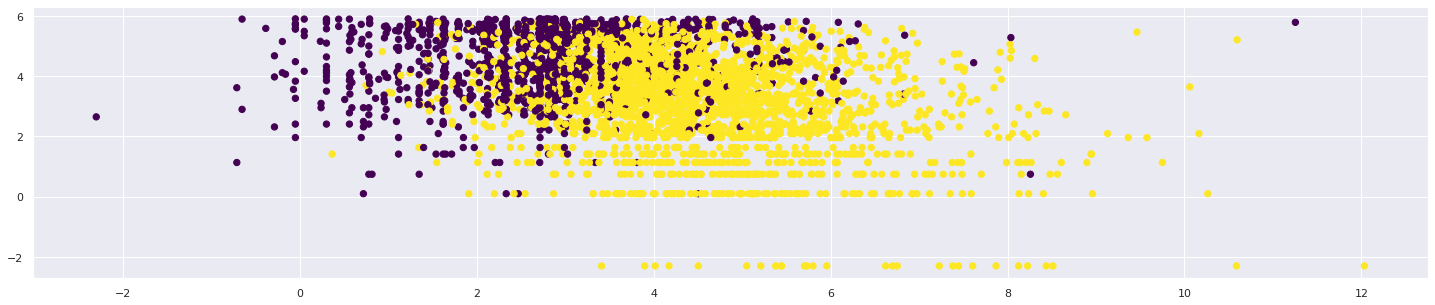

In [191]:
gmm = GaussianMixture(n_components = 2).fit(matrix)
labels = gmm.predict(matrix)
plt.scatter(matrix[:, 0], matrix[:, 1], c=labels, s=40, cmap='viridis');

##### Observations

The GMM didn't provide a better result at this level than k-means.

In [193]:
rfm_data["Cluster"] = clusters_customers
rfm_data.head()

Recency  Frequency   Monetary  Cluster
CustomerID                                        
12346.0000      325          1 77183.6000        1
12747.0000        2         10   658.8900        1
12748.0000        0        196  3739.2300        1
12749.0000        3          5    98.3500        1
12820.0000        3          4    58.2000        1

## **Conclusion**

At this juncture, it makes sense to show interested stakeholders the cluster solutions and get their input. The decision should be based upon how the business plans to use the results, and the level of granularity they want to see in the clusters. 

What range of customer behavior from high-to-low value customers are the business stakeholders interested in exploring? And from the answer to that question various methods of clustering can be further exploited whether applied on RFM variables or directly on the transaction dataset available.

For now, we have successfully implemented RFM Customer Segmentation on the given dataset.